# Polarization reconstruction of SpiceCore events

### Feb 8, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/CenA_sourceSearch/Stokes")
# import deDisperse_util as util
# from pyrex.internal_functions import normalize
my_path_plots = os.path.abspath("./plots/")
# import pyrex.custom.ara as ara


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [3]:
SpiceCore0 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh0_8.pkl")
SpiceCore0 = SpiceCore0.loc[SpiceCore0.theta_reco>=90]

SpiceCore1 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh1_9.pkl")
SpiceCore1 = SpiceCore1.loc[SpiceCore1.theta_reco>=90]

SpiceCore2 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh2_10.pkl")
SpiceCore2 = SpiceCore2.loc[SpiceCore2.theta_reco>=90]

SpiceCore3 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh3_11.pkl")
SpiceCore3 = SpiceCore3.loc[SpiceCore3.theta_reco>=90]

SpiceCore4 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh4_12.pkl")
SpiceCore4 = SpiceCore4.loc[SpiceCore4.theta_reco>=90]

SpiceCore5 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh5_13.pkl")
SpiceCore5 = SpiceCore5.loc[SpiceCore5.theta_reco>=90]

SpiceCore6 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/evNumVsOmegaCh6_14.pkl")
SpiceCore6 = SpiceCore6.loc[SpiceCore6.theta_reco>=90]

len(SpiceCore2)

722

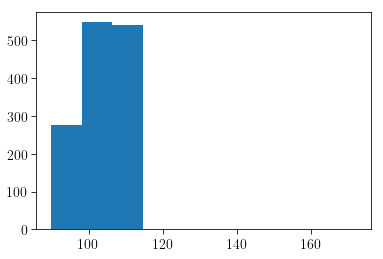

In [4]:
plt.hist(SpiceCore0.theta_reco);

In [5]:
depth_1224 = pd.read_csv("./plots/SpiceCorePolReco/A2_1224Depth.txt")
depth_1224.head()

,NZ_Time,depth
0,12:35,300
1,12:54,400
2,13:27,400
3,13:38,510
4,13:55,725


In [6]:
time = pd.to_datetime(depth_1224.NZ_Time)
# time = time.reindex(time)
# time = time.tz_localize('NZ').tz_convert("UTC")
time.head()
newTime = time.apply(lambda dt: dt.replace(day=24, month = 12, year = 2018))
# newTime#Still in NZ local time. Need to translate to UTC
df = pd.DataFrame(1, index=newTime, columns=['X'])
import pytz
nz = pytz.timezone('NZ')
utc = pytz.timezone('UTC')
df.index = df.index.tz_localize(nz).tz_convert(utc)
unixTimeDepth = (df.index - pd.Timestamp("1970-01-01").tz_localize(utc)) // pd.Timedelta('1s')#This is unix time 

## Events debugging

(1545617015, 1545621500.0)

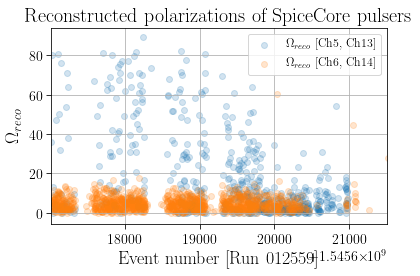

In [7]:
# plt.figure(figsize=(7,5))
# plt.scatter(SpiceCore0.unixtime, SpiceCore0.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch0, Ch8]")
# plt.scatter(SpiceCore1.unixtime, SpiceCore1.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch1, Ch9]")
# plt.scatter(SpiceCore2.unixtime, SpiceCore2.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch2, Ch10]")
# plt.scatter(SpiceCore3.unixtime, SpiceCore3.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch3, Ch11]")
# plt.scatter(SpiceCore4.unixtime, SpiceCore4.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch4, Ch12]")
plt.scatter(SpiceCore5.unixtime, SpiceCore5.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch5, Ch13]")
plt.scatter(SpiceCore6.unixtime, SpiceCore6.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch6, Ch14]")

# plt.hist2d(SpiceCore2.EvNum, SpiceCore2.Omega_reco, bins = 100)
# plt.colorbar()
# plt.axhline(mean, linestyle = "--", color = "C1", lw = 2, label = "Mean = %0.2f"%mean)
plt.legend()
plt.grid()
plt.ylabel("$\Omega_{reco}$")
plt.xlabel("Event number [Run 012559]")
plt.title("Reconstructed polarizations of SpiceCore pulsers")
plt.tight_layout()
# plt.ylim(0,30)
plt.xlim(min(SpiceCore2.unixtime),2.15*1E4+1.5456*1E9)

# ax1.set_xlim(min(SpiceCore2.unixtime),2.2*1E4+1.5456*1E9)

# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559.png', dpi=250)


In [8]:
foo = "bar"
exec(foo + " = 'SpiceCore%i'"%3)
print(bar)

SpiceCore3


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


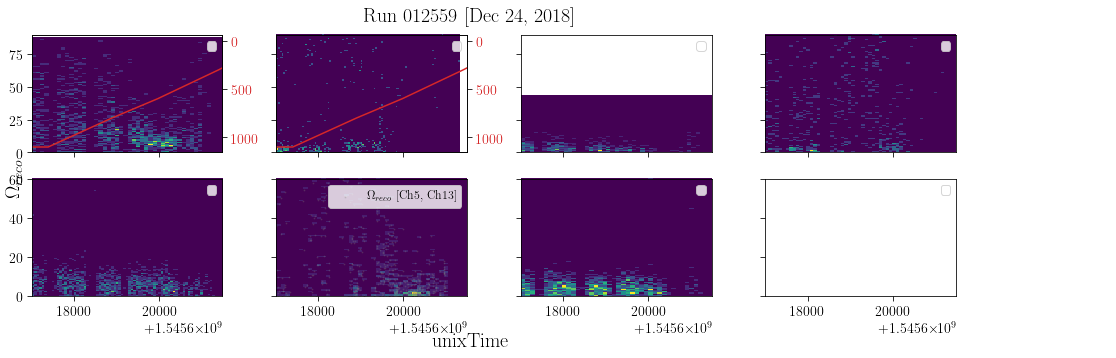

In [9]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
axs[0].hist2d(SpiceCore0.unixtime, SpiceCore0.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch0, Ch8]")
ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
ax2.plot(unixTimeDepth, depth_1224.depth, color=color, label = "SpiceCore depth")
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()

axs[1].hist2d(SpiceCore1.unixtime, SpiceCore1.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch1, Ch9]")

ax2 = axs[1].twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('', color=color)  # we already handled the x-label with ax1
ax2.plot(unixTimeDepth, depth_1224.depth, color=color, label = "SpiceCore depth")
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()

axs[2].hist2d(SpiceCore2.unixtime, SpiceCore2.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch2, Ch10]")

axs[3].hist2d(SpiceCore3.unixtime, SpiceCore3.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch3, Ch11]")
axs[4].hist2d(SpiceCore4.unixtime, SpiceCore4.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch4, Ch12]")
axs[5].hist2d(SpiceCore5.unixtime, SpiceCore5.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch5, Ch13]")
axs[5].scatter(SpiceCore5.unixtime, SpiceCore5.Omega_reco, color = "gray",alpha = 0.2, s = 1, label = "$\Omega_{reco}$ [Ch5, Ch13]")

axs[6].hist2d(SpiceCore6.unixtime, SpiceCore6.Omega_reco, bins = 100, label = "$\Omega_{reco}$ [Ch6, Ch14]")
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.05, 'unixTime', ha='center', va='center', fontsize=20)
fig.text(0.05, 0.5, '$\Omega_{reco}$', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(min(SpiceCore0.unixtime),2.15*1E4+1.5456*1E9)
    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559_AllChHist.png', dpi=250)


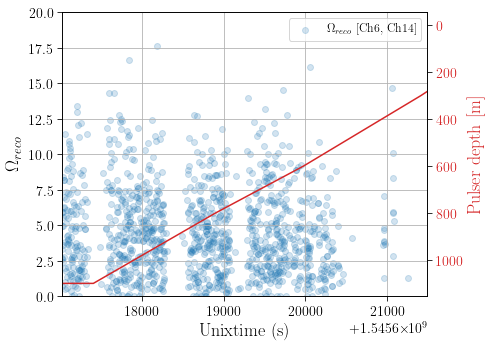

In [10]:
fig, ax1 = plt.subplots(figsize=(7,5))

# color = 'tab:k'
ax1.set_xlabel('Unixtime (s)')
ax1.set_ylabel("$\Omega_{reco}$")
# ax1.scatter(SpiceCore0.unixtime, SpiceCore0.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch0, Ch8]")
# ax1.scatter(SpiceCore1.unixtime, SpiceCore1.Omega_reco, alpha = 0.3, label = "$\Omega_{reco}$ [Ch1, Ch9]")
# ax1.scatter(SpiceCore2.unixtime, SpiceCore2.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch2, Ch10]")
# plt.scatter(SpiceCore5.unixtime, SpiceCore5.Omega_reco, alpha = 0.3, label = "$\Omega_{reco}$ [Ch5, Ch13]")

ax1.scatter(SpiceCore6.unixtime, SpiceCore6.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch6, Ch14]")
# ax1.scatter(SpiceCore6_SNR.unixtime, SpiceCore6_SNR.Omega_reco, alpha = 0.3, label = "$\Omega_{reco}$ [SNR cut]")

ax1.tick_params(axis='y')
ax1.grid()
ax1.set_xlim(min(SpiceCore2.unixtime),2.15*1E4+1.5456*1E9)
ax1.set_ylim(0,20)
plt.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Pulser depth [m]', color=color)  # we already handled the x-label with ax1
ax2.plot(unixTimeDepth, depth_1224.depth, color=color, label = "SpiceCore depth")
ax2.tick_params(axis='y', labelcolor=color)
ax2.invert_yaxis()

# plt.legend()
plt.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559.png', dpi=250)


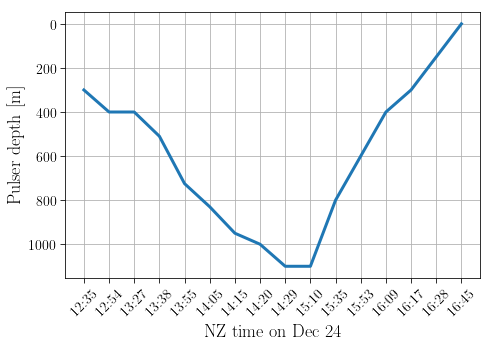

In [11]:
fig, ax1 = plt.subplots(figsize=(7,5))

plt.plot(depth_1224.NZ_Time, depth_1224.depth, lw = 3)
plt.xticks(depth_1224.NZ_Time, rotation=45);
ax1.invert_yaxis()
plt.xlabel("NZ time on Dec 24")
plt.ylabel("Pulser depth [m]")
plt.grid()
plt.tight_layout()
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Dec24TimeVsDepth.png', dpi=250)


In [12]:
depth_1224

,NZ_Time,depth
0,12:35,300
1,12:54,400
2,13:27,400
3,13:38,510
4,13:55,725
5,14:05,830
6,14:15,950
7,14:20,1000
8,14:29,1100
9,15:10,1100


In [13]:
f = scipy.interpolate.interp1d(unixTimeDepth, depth_1224.depth,bounds_error=False, fill_value=0.)

In [14]:
SpiceCore2ForInterp = SpiceCore2.loc[(SpiceCore2.unixtime>min(SpiceCore2.unixtime)) & (SpiceCore2.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore2ForInterp.unixtime)
SpiceCore2ForInterp["interp_depth"] = interp_depth

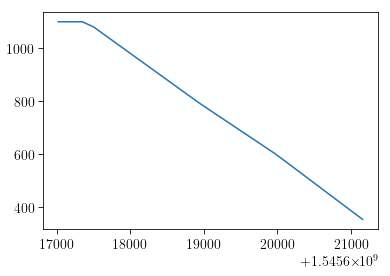

In [15]:
plt.plot(SpiceCore2ForInterp.unixtime,interp_depth)

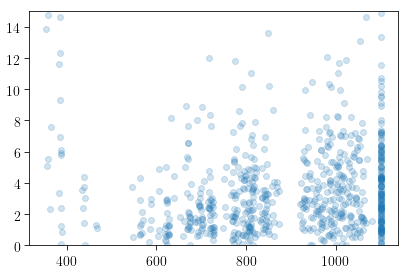

In [16]:
# plt.hist2d(interp_depth, SpiceCore2ForInterp.Omega_reco, bins = 100);
plt.scatter(interp_depth, SpiceCore2ForInterp.Omega_reco, alpha = 0.2)
plt.ylim(0,15)
# plt.xlim(350,1000)
plt.tight_layout()

In [17]:
# sns.lmplot("interp_depth", "Omega_reco", data = SpiceCore2ForInterp, scatter=False)

# Interpolate all channels

In [18]:
SpiceCore0ForInterp = SpiceCore0.loc[(SpiceCore0.unixtime>min(SpiceCore0.unixtime)) & (SpiceCore0.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore0ForInterp.unixtime)
SpiceCore0ForInterp["interp_depth"] = interp_depth

SpiceCore1ForInterp = SpiceCore1.loc[(SpiceCore1.unixtime>min(SpiceCore1.unixtime)) & (SpiceCore1.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore1ForInterp.unixtime)
SpiceCore1ForInterp["interp_depth"] = interp_depth

SpiceCore2ForInterp = SpiceCore2.loc[(SpiceCore2.unixtime>min(SpiceCore2.unixtime)) & (SpiceCore2.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore2ForInterp.unixtime)
SpiceCore2ForInterp["interp_depth"] = interp_depth

SpiceCore3ForInterp = SpiceCore3.loc[(SpiceCore3.unixtime>min(SpiceCore3.unixtime)) & (SpiceCore3.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore3ForInterp.unixtime)
SpiceCore3ForInterp["interp_depth"] = interp_depth

SpiceCore4ForInterp = SpiceCore4.loc[(SpiceCore4.unixtime>min(SpiceCore4.unixtime)) & (SpiceCore4.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore4ForInterp.unixtime)
SpiceCore4ForInterp["interp_depth"] = interp_depth

SpiceCore5ForInterp = SpiceCore5.loc[(SpiceCore5.unixtime>min(SpiceCore5.unixtime)) & (SpiceCore5.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore5ForInterp.unixtime)
SpiceCore5ForInterp["interp_depth"] = interp_depth

SpiceCore6ForInterp = SpiceCore6.loc[(SpiceCore6.unixtime>min(SpiceCore6.unixtime)) & (SpiceCore6.unixtime<2.15*1E4+1.5456*1E9)]
interp_depth = f(SpiceCore6ForInterp.unixtime)
SpiceCore6ForInterp["interp_depth"] = interp_depth

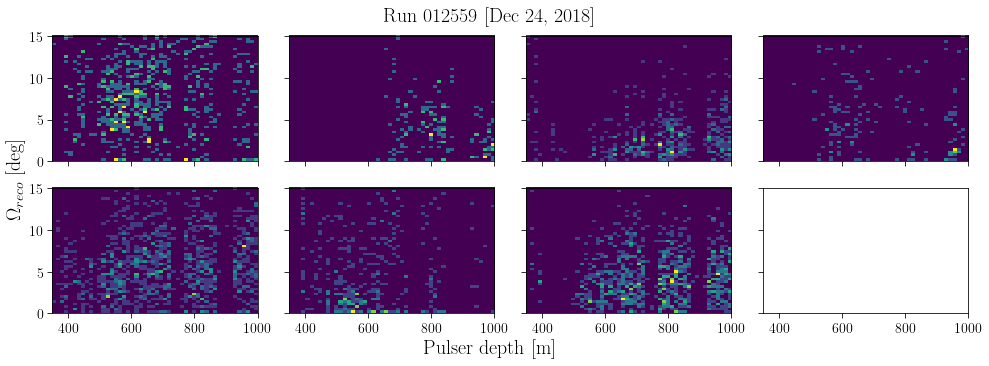

In [20]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
axs[0].hist2d(SpiceCore0ForInterp.interp_depth, SpiceCore0ForInterp.Omega_reco, range=[(350, 1000),(0, 15)],bins = 50)
axs[1].hist2d(SpiceCore1ForInterp.interp_depth, SpiceCore1ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
axs[2].hist2d(SpiceCore2ForInterp.interp_depth, SpiceCore2ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
axs[3].hist2d(SpiceCore3ForInterp.interp_depth, SpiceCore3ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
axs[4].hist2d(SpiceCore4ForInterp.interp_depth, SpiceCore4ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
axs[5].hist2d(SpiceCore5ForInterp.interp_depth, SpiceCore5ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
axs[6].hist2d(SpiceCore6ForInterp.interp_depth, SpiceCore6ForInterp.Omega_reco, range=[(350, 1000),(0, 15)], bins = 50)
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, '$\Omega_{reco}$ [deg]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
#     ax.set_ylim(0,25)

#     ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559_AllChHistZoom.png', dpi=250)


No handles with labels found to put in legend.


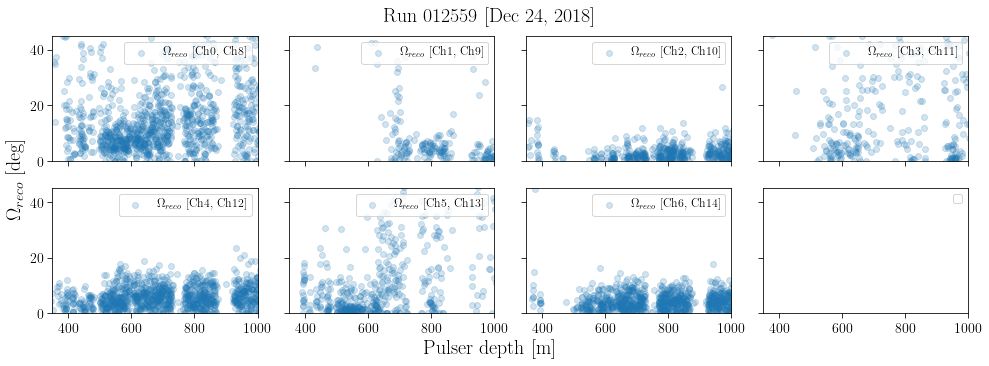

In [19]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
axs[0].scatter(SpiceCore0ForInterp.interp_depth, SpiceCore0ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch0, Ch8]")
axs[1].scatter(SpiceCore1ForInterp.interp_depth, SpiceCore1ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch1, Ch9]")
axs[2].scatter(SpiceCore2ForInterp.interp_depth, SpiceCore2ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch2, Ch10]")
axs[3].scatter(SpiceCore3ForInterp.interp_depth, SpiceCore3ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch3, Ch11]")
axs[4].scatter(SpiceCore4ForInterp.interp_depth, SpiceCore4ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch4, Ch12]")
axs[5].scatter(SpiceCore5ForInterp.interp_depth, SpiceCore5ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch5, Ch13]")
axs[6].scatter(SpiceCore6ForInterp.interp_depth, SpiceCore6ForInterp.Omega_reco, alpha = 0.2, label = "$\Omega_{reco}$ [Ch6, Ch14]")
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, '$\Omega_{reco}$ [deg]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(0,45)

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolRecScatterOmegaRecoVsDepth_run012559_AllCh_reject.png', dpi=250)


AttributeError: 'DataFrame' object has no attribute 'SNR'

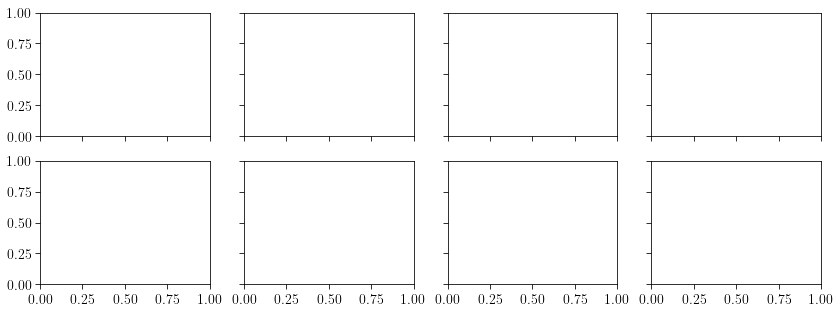

In [20]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
axs[0].scatter(SpiceCore0ForInterp.interp_depth, SpiceCore0ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch0, Ch8]")
axs[1].scatter(SpiceCore1ForInterp.interp_depth, SpiceCore1ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch1, Ch9]")
axs[2].scatter(SpiceCore2ForInterp.interp_depth, SpiceCore2ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch2, Ch10]")
axs[3].scatter(SpiceCore3ForInterp.interp_depth, SpiceCore3ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch3, Ch11]")
axs[4].scatter(SpiceCore4ForInterp.interp_depth, SpiceCore4ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch4, Ch12]")
axs[5].scatter(SpiceCore5ForInterp.interp_depth, SpiceCore5ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch5, Ch13]")
axs[6].scatter(SpiceCore6ForInterp.interp_depth, SpiceCore6ForInterp.SNR, alpha = 0.2, label = "$\Omega_{reco}$ [Ch6, Ch14]")
# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'SNR', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
#     ax.set_ylim(0,90)

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/Hist2DOmegaReco_SpiceCore_run012559_AllChHist.png', dpi=250)


In [21]:
np.degrees(np.arctan(0.25))

14.036243467926479

No handles with labels found to put in legend.


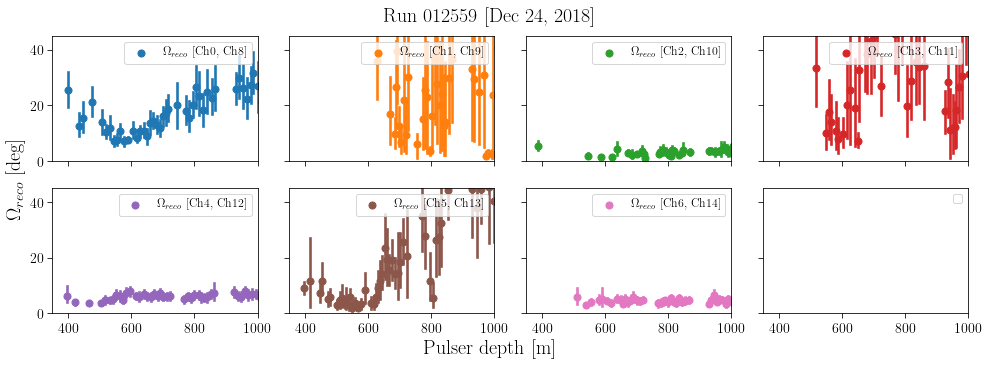

In [23]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
sns.regplot(x=SpiceCore0ForInterp.interp_depth, y=SpiceCore0ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[0], label = "$\Omega_{reco}$ [Ch0, Ch8]")
sns.regplot(x=SpiceCore1ForInterp.interp_depth, y=SpiceCore1ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[1], label = "$\Omega_{reco}$ [Ch1, Ch9]")
sns.regplot(x=SpiceCore2ForInterp.interp_depth, y=SpiceCore2ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[2], label = "$\Omega_{reco}$ [Ch2, Ch10]")
sns.regplot(x=SpiceCore3ForInterp.interp_depth, y=SpiceCore3ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[3], label = "$\Omega_{reco}$ [Ch3, Ch11]")
sns.regplot(x=SpiceCore4ForInterp.interp_depth, y=SpiceCore4ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[4], label = "$\Omega_{reco}$ [Ch4, Ch12]")
sns.regplot(x=SpiceCore5ForInterp.interp_depth, y=SpiceCore5ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[5], label = "$\Omega_{reco}$ [Ch5, Ch13]")
sns.regplot(x=SpiceCore6ForInterp.interp_depth, y=SpiceCore6ForInterp.Omega_reco, x_bins=50, fit_reg=None, ax =axs[6], label = "$\Omega_{reco}$ [Ch6, Ch14]")

# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, '$\Omega_{reco}$ [deg]', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(0,45)
    ax.set(xlabel="", ylabel = "")

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolRecScatterOmegaRecoVsDepth_run012559_AllCh_reject_Profile.png', dpi=250)


No handles with labels found to put in legend.


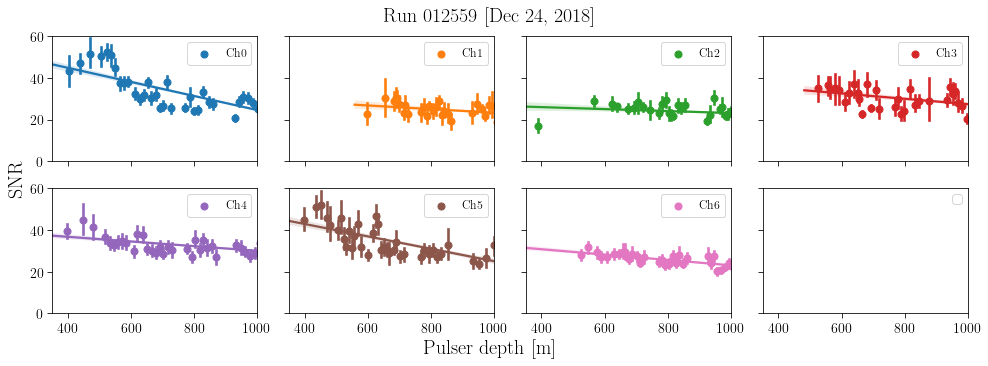

In [24]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
sns.regplot(x=SpiceCore0ForInterp.interp_depth, y=SpiceCore0ForInterp.SNR_V, x_bins=40, ax =axs[0], label = "Ch0")
sns.regplot(x=SpiceCore1ForInterp.interp_depth, y=SpiceCore1ForInterp.SNR_V, x_bins=40, ax =axs[1], label = "Ch1")
sns.regplot(x=SpiceCore2ForInterp.interp_depth, y=SpiceCore2ForInterp.SNR_V, x_bins=40, ax =axs[2], label = "Ch2")
sns.regplot(x=SpiceCore3ForInterp.interp_depth, y=SpiceCore3ForInterp.SNR_V, x_bins=40, ax =axs[3], label = "Ch3")
sns.regplot(x=SpiceCore4ForInterp.interp_depth, y=SpiceCore4ForInterp.SNR_V, x_bins=40, ax =axs[4], label = "Ch4")
sns.regplot(x=SpiceCore5ForInterp.interp_depth, y=SpiceCore5ForInterp.SNR_V, x_bins=40, ax =axs[5], label = "Ch5")
sns.regplot(x=SpiceCore6ForInterp.interp_depth, y=SpiceCore6ForInterp.SNR_V, x_bins=40, ax =axs[6], label = "Ch6")

# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'SNR', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(0,60)
    ax.set(xlabel="", ylabel = "")

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolSNRVsDepth_run012559_AllCh_reject_Profile.png', dpi=250)


No handles with labels found to put in legend.


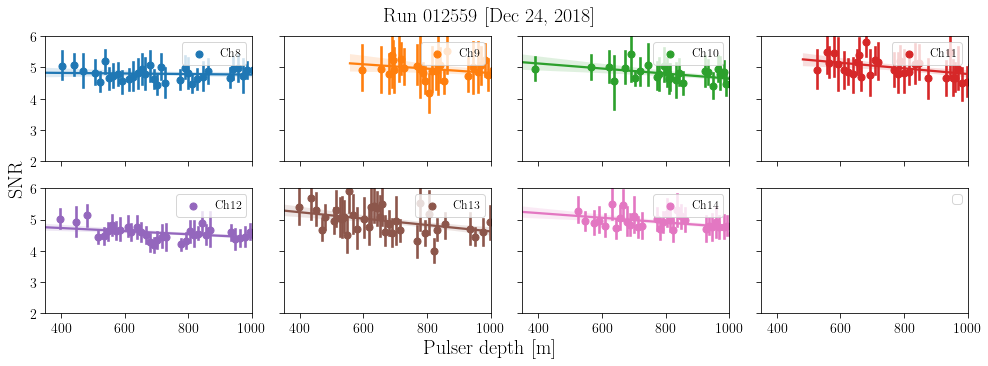

In [31]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
sns.regplot(x=SpiceCore0ForInterp.interp_depth, y=SpiceCore0ForInterp.SNR_H, x_bins=40, ax =axs[0], label = "Ch8")
sns.regplot(x=SpiceCore1ForInterp.interp_depth, y=SpiceCore1ForInterp.SNR_H, x_bins=40, ax =axs[1], label = "Ch9")
sns.regplot(x=SpiceCore2ForInterp.interp_depth, y=SpiceCore2ForInterp.SNR_H, x_bins=40, ax =axs[2], label = "Ch10")
sns.regplot(x=SpiceCore3ForInterp.interp_depth, y=SpiceCore3ForInterp.SNR_H, x_bins=40, ax =axs[3], label = "Ch11")
sns.regplot(x=SpiceCore4ForInterp.interp_depth, y=SpiceCore4ForInterp.SNR_H, x_bins=40, ax =axs[4], label = "Ch12")
sns.regplot(x=SpiceCore5ForInterp.interp_depth, y=SpiceCore5ForInterp.SNR_H, x_bins=40, ax =axs[5], label = "Ch13")
sns.regplot(x=SpiceCore6ForInterp.interp_depth, y=SpiceCore6ForInterp.SNR_H, x_bins=40, ax =axs[6], label = "Ch14")

# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'SNR', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(2,6)
    ax.set(xlabel="", ylabel = "")

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
# plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolSNRVsDepth_run012559_AllCh_reject_ProfileHpol.png', dpi=250)


# Soft trigger events

In [3]:
Soft0 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh0_8.pkl")

Soft1 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh1_9.pkl")

Soft2 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh2_10.pkl")

Soft3 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh3_11.pkl")

Soft4 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh4_12.pkl")

Soft5 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh5_13.pkl")

Soft6 = pd.read_pickle("../ARA_analysis/ARA_Reconstruction/SNR_softTriggersCh6_14.pkl")

len(Soft0)

10729

In [35]:
interp_depth = f(Soft0.unixtime)
Soft0["interp_depth"] = interp_depth

interp_depth = f(Soft1.unixtime)
Soft1["interp_depth"] = interp_depth

interp_depth = f(Soft2.unixtime)
Soft2["interp_depth"] = interp_depth

interp_depth = f(Soft3.unixtime)
Soft3["interp_depth"] = interp_depth

interp_depth = f(Soft4.unixtime)
Soft4["interp_depth"] = interp_depth

interp_depth = f(Soft5.unixtime)
Soft5["interp_depth"] = interp_depth

interp_depth = f(Soft6.unixtime)
Soft6["interp_depth"] = interp_depth

No handles with labels found to put in legend.


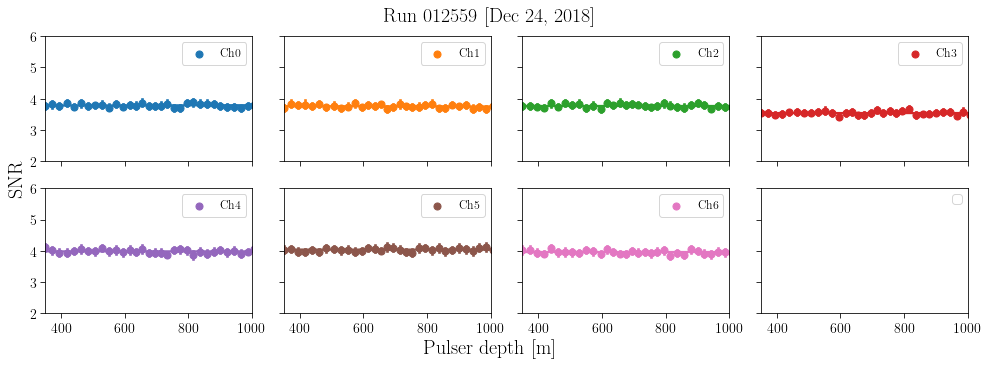

In [40]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
sns.regplot(x=Soft0.interp_depth, y=Soft0.SNR_V, x_bins=100, ax =axs[0], label = "Ch0")
sns.regplot(x=Soft1.interp_depth, y=Soft1.SNR_V, x_bins=100, ax =axs[1], label = "Ch1")
sns.regplot(x=Soft2.interp_depth, y=Soft2.SNR_V, x_bins=100, ax =axs[2], label = "Ch2")
sns.regplot(x=Soft3.interp_depth, y=Soft3.SNR_V, x_bins=100, ax =axs[3], label = "Ch3")
sns.regplot(x=Soft4.interp_depth, y=Soft4.SNR_V, x_bins=100, ax =axs[4], label = "Ch4")
sns.regplot(x=Soft5.interp_depth, y=Soft5.SNR_V, x_bins=100, ax =axs[5], label = "Ch5")
sns.regplot(x=Soft6.interp_depth, y=Soft6.SNR_V, x_bins=100, ax =axs[6], label = "Ch6")

# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'SNR', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(2,6)
    ax.set(xlabel="", ylabel = "")

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolSNRVsDepth_run012559_SoftTrigVpol.png', dpi=250)


No handles with labels found to put in legend.


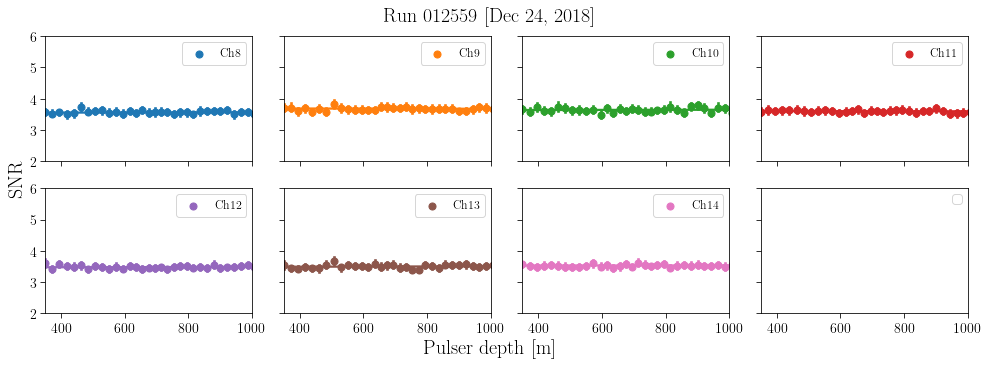

In [41]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(14,5))
axs = ax.ravel()
sns.regplot(x=Soft0.interp_depth, y=Soft0.SNR_H, x_bins=100, ax =axs[0], label = "Ch8")
sns.regplot(x=Soft1.interp_depth, y=Soft1.SNR_H, x_bins=100, ax =axs[1], label = "Ch9")
sns.regplot(x=Soft2.interp_depth, y=Soft2.SNR_H, x_bins=100, ax =axs[2], label = "Ch10")
sns.regplot(x=Soft3.interp_depth, y=Soft3.SNR_H, x_bins=100, ax =axs[3], label = "Ch11")
sns.regplot(x=Soft4.interp_depth, y=Soft4.SNR_H, x_bins=100, ax =axs[4], label = "Ch12")
sns.regplot(x=Soft5.interp_depth, y=Soft5.SNR_H, x_bins=100, ax =axs[5], label = "Ch13")
sns.regplot(x=Soft6.interp_depth, y=Soft6.SNR_H, x_bins=100, ax =axs[6], label = "Ch14")

# axs[6].set_xlabel("unixTime")
fig.text(0.5, 0.03, 'Pulser depth [m]', ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, 'SNR', ha='center', va='center', rotation='vertical', fontsize=20)

for ax in axs:
#     ax.set_xlabel("a")
    ax.set_xlim(350,1000)
    ax.set_ylim(2,6)
    ax.set(xlabel="", ylabel = "")

    ax.legend(loc="upper right")

plt.suptitle("Run 012559 [Dec 24, 2018]", fontsize=20)
plt.tight_layout(rect=[0.03, 0.03, 1, 0.95])
plt.savefig(my_path_plots+'/SpiceCorePolReco/SpiceCorePolSNRVsDepth_run012559_SoftTrigHpol.png', dpi=250)


In [4]:
Soft0

,EvNum,unixtime,SNR_V,SNR_H
0,18,1545617007,3.223026,4.064232
1,25,1545617008,3.486725,3.881684
2,36,1545617009,3.303444,3.274977
3,40,1545617010,3.361536,3.775329
4,47,1545617011,4.003439,3.890160
...,...,...,...,...
10724,64747,1545627800,3.130867,3.362318
10725,64752,1545627801,4.295146,3.785118
10726,64755,1545627802,4.104155,4.332590
10727,64760,1545627803,3.880402,4.033732
